Classify animals into dog and cat category based of given features 
- Plays Fetch Game
- Grumpy in nature
- Favorite food


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from io import StringIO
dataset =StringIO('''Plays Fetch,Is grumpy,Favorite food,Species
Yes,No,Bacon,Dog
No,Yes,Dog Food,Dog
No,Yes,Cat food,Cat
No,Yes,Bacon,Cat
No,No,Cat food,Cat
No,Yes,Bacon,Cat
No,Yes,Cat Food,Cat
No,No,Dog Food,Dog
No,Yes,Cat food,Cat
Yes,No,Dog Food,Dog
Yes,No,Bacon,Dog
No,No,Cat food,Cat
Yes,Yes,Cat food,Cat
Yes,Yes,Bacon,Dog
''')
df = pd.read_csv(dataset)

# filter and arrange data

In [9]:
import numpy as np

df['B plays fetch']=np.where(df['Plays Fetch']=='Yes',True,False)     #alternate to .apply(lambda)
df['B is grumpy']=np.where(df['Is grumpy']=='Yes',True,False)  
df['B Favorite Food']=[0 if(food=='Bacon')else
                        1 if(food=='Dog Food') else 2
                        for food in df['Favorite food']] 
df

,Plays Fetch,Is grumpy,Favorite food,Species,B plays fetch,B is grumpy,B Favourite Food,B Favorite Food
0,Yes,No,Bacon,Dog,True,False,0,0
1,No,Yes,Dog Food,Dog,False,True,1,1
2,No,Yes,Cat food,Cat,False,True,2,2
3,No,Yes,Bacon,Cat,False,True,0,0
4,No,No,Cat food,Cat,False,False,2,2
5,No,Yes,Bacon,Cat,False,True,0,0
6,No,Yes,Cat Food,Cat,False,True,2,2
7,No,No,Dog Food,Dog,False,False,1,1
8,No,Yes,Cat food,Cat,False,True,2,2
9,Yes,No,Dog Food,Dog,True,False,1,1


In [14]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
obtained_tree=decisiontree.fit(df[['B plays fetch','B is grumpy','B Favorite Food']],df['Species'])
print('Extracted class',decisiontree.classes_)

Extracted class ['Cat' 'Dog']


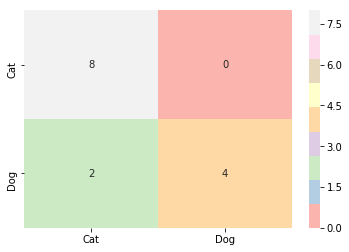

In [18]:
import seaborn as sb
Predicted_species=obtained_tree.predict(df[['B plays fetch','B is grumpy','B Favorite Food']])
sb.heatmap(confusion_matrix(df['Species'],Predicted_species),annot=True,cmap='Pastel1',xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)

In [19]:
print(classification_report(df['Species'],Predicted_species))    #actual_values,Predicted_values

             precision    recall  f1-score   support

        Cat       0.80      1.00      0.89         8
        Dog       1.00      0.67      0.80         6

avg / total       0.89      0.86      0.85        14



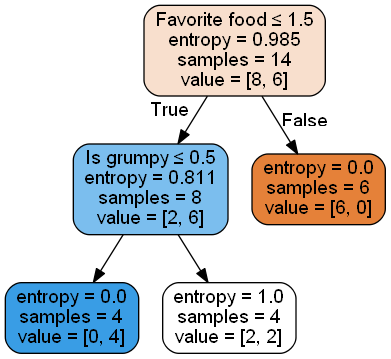

In [24]:
#Performance mesure
#Entropy=Similar to uncertainity,quantify the amount of uncertainity using a measure called entropy
import os
os.environ['PATH'] +=os.pathsep +'C:\\Program Files (x86)\\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYcAAAFnCAYAAABNWoX8AAAABmJLR0QA/wD/AP+gvaeTAAAgAElEQVR4nOydeVxN+f/HX9nKoJQlZEsTlcoQZmxlsqVkH1sYfMuUsU7GkDAGMb4IDTVq8EO2r7VkMtQokp2UioSQkSWlomz390dzjrvfe+7Subfez8ejx8M95/M5531u+bzP5/3+fN4vA4FAIABBEARBfGJ6Nb4tIAiCIHQPcg4EQRCEBOQcCIIgCAlq8G0AUfUoKChAWloa8vPzUVZWxrc5RCXDwMAAZmZmsLS0hKWlJd/m6C3kHIgKIT09Hf/3f/+H4zExSLt5k29ziCpCo4YNMcDNDaNHj4a7uzuqVaNgibIY0GolQpvcuXMH/j/8gKjoaFi3aY3hA13h/FVn2Fm3gWl9ExgZ1uLbRKKS8fHjRxQUFuHuw0e4eC0Vx04l4vS5S7Bq0wa/rl6NYcOG8W2iPjCdnAOhFcrKyrBkyRIEBwfDqlUL/LpwNvo5d4OBgQHfphFVkOych/hlXRj2R59A//79sGnTZlhZWfFtli5DzoHQPM+fP8ewYUOReuMGfvb3g4/XSNSoXp1vswgCSZeu4Yela/DwnzwcOnQYLi4ufJukq9A+B0KzZGRk4MuuXfEk9xGSju6A38TR5BgInaFHl45IPLQNbi7d0b9/f/zf//0f3ybpLJSQJjTGs2fP4D5wIFo0bYh9oWtgVt+Yb5MIQgLDWrXwx9ql+NyyJby9vWFqaorBgwfzbZbOQc6B0AilpaXwHDQIjc2McXTrRnxW24hvkwhCJgYGBgiY4Y2PHz5g7NgxOH/+AhwcHPg2S6cg50BohAUL5uPRwwdIPLRVoWMwsnRSeL3Se1c0ZZpGYWwXtu/h4ydo0ayJRu9TWFSMgzEnMW3BcgDAjo1BGOU5QKP3UAZpz6tNYuISMcJ7Dqf7yft7UnSdhbOmIjvnEYYOGYKb6ekwMqKXGgbKORBqk5aWhs2bN2Nv6GpYNDHn25wKZX34Llj38ND4dbftPcI6BgB4/OSZxu+ha9zIuI0R3nM49Xn4+Ila9zQwMMDmlYGoWd0Aq1evVutalQ1arUSoTd8+rmjZuD5CVwYq1b6i30a1ibaehbnuw8sn0aiBmUavrYodqjzfjYzbiD97EbN9xitse/FaKpyHT2I/K3u/h4+fwLqHB1YFzFHqPrI4deY8RvnOxe3bWbCwsFD5OpUIWq1EqEdMTAySk89j2Y/f821KpYRPx6AqF6+lYkbgSnR1H4v5QcEK268P3wXn4ZOwY2MQ53tl338IAPiifTvOfYXp2+srOH/ZGYsWKfeCUxUg50CoxW8hIRjlOQANzUy1do8bGbexPnwXjCydYGTphBHec7A/+gSA8ti8kaUTZgSulNp3RuBKGFk6obComD22P/oERnjPkbiWMMy9Hj5+ghHec7B0bajIcebf4u2FOX3uEnv/Ed5zcPrcJaWeV9F1lbFf3bby2kmjsKiYzRcwM4CDEcF4ePmkwr7zg4JxMCKYl5yKMH4Tv8Hu3bvx/PlzXu3QFSghTahMfn4+Tp46haPbNmrtHsyAI34sJi4RADDKcwBWBczB/KBgLJ7zncib9rMX+QiPPIBVAXNgUq8uAGDp2lCs/C1C4loZt+9iib+fxP237jmMmLhEjB7ixsluWfdZMN1b6n3Uva40+7m0nRG4EuGRB9jPE2cGKJXnePj4CZKvpGDizAB49HHG6CFuWP/LT5wS9OqE5K7fvAUAMDM1wda9h9k8zeaVgRjh0Y/9vStD317dUKd2bRw5cgTe3t4q21RZoJkDoTJxcXGoVs0Avb7spFJ/5q1Y/EcYxjEkHtqO0ntXUHrvCrKSYgCUD2AA4NqzKwDgb7E3c+azR99eAMrf5Ff+FoEF072RlRTDXmvBdG+s/C1C6pu9bds2KL13RepbrfCgxtgmfp+8GwkovXcFeTcS2PvcyLgt93tR5rqK7OfaNjzygETbwldFcu0EAOseHpg4MwA7Ngaxb/+aXrmlDF3dx4ok8KctWI4pcxaJzBgVUb16Nbh064yTJxXPdqoC5BwIlUlJSYHN521gWEt7xfOYwdGypQVuZNxGTFwitu45LNLG0bYtPPo4Y9/RWJHj+47GwsdrJKwtWwEADh4/BQCYMnYYO4C1aNYEU8YOEzkvzNfdu3C2OSH5MgBg9tQJ7JurSb26mD11AgAg/uxFztcUtk8Z+7m0ZewVbztuuLtCm7KSYrBjYxAmzgxgw1bqriDiApPTEH55KL13BTs2BiEmLhEnTidxup69jTVupKRow1S9g1YrESozZcoU5N69hajtIZz6cV0BIx4eEUb4rdrNyxep8YdgbdkKWfdy4OA6HLGRYej97wAv777i52S1VaadJvZxyLuuOvar21YWhUXFOHvxKhuG8/EaCbeve6DrF/ackuqaXP1lZOkEjz7OOBihOCnOsH3fEfy4IhivlJg1VXKmU86BUJmysjJOMV1V2Lr3MFb+FgEfr5EY4d4XZqYmaNq4IVp07ifSrqODLQDgzIWrsLZshWtpmSLHCe1iUq8uPPo4w6OPMy5eS8XOg8fYkCCfS5aZ3JSyGBkZoYhDKKoyQ2ElQi2qV9funxATRw5ZvgC9u3eBo21b1JISxjKpVxebVwZi2oLlePYiHxNnBmDzykAR5+XjNRKA5MaprHs5IufVhbkOk2+Q9qPOdZWxn0vbBdO9Rc4xqBoe6trRASHLF+Di8T1YFcBtUxtXmNVV4rkF5rOmfqdVEXIOhF7ADFyFRcVYv2Wn1DZMYpyZVfRz7iZyfoR7XwDlK5CYge/h4yfYfeg4AMDt6x4q2yc8ODH3Wb9lJ569yGePnz53CUaWTlgfvkule3Cxn0tbl26dAQDzV6wXaSue2+GKo21btTamKQOzikw8t8B8Zr4HgjsUViJ0GibZ6eA6XOr5rHs5bMLZ2rIVfLxGIjzyAHy8RkqsmundvQu7Wkc8h7Fgujc8+jhzts+jjzNi4hJh7ugCH6+R7AxH1n08+jjDS4lErzS42K9qW+EwzGYldrxXdJ0s8ZzEgN494NHHGRNnBrCr1xgWTPdm800Ed2jmQOg0ozwHiAxSC6Z7IzX+EC4e3wOgPMcgDPOmOGHEIKnXW+Lvhx0bg9jB0aOPM3ZsDFJ578GSf8WMAODxk6cS9xEOa2xeGYiwXxepteuZi/3qtN2xMQhTxui+nKZJvbrYGrxMxHYfr5GIjQxTaz8JQauVCDXw8vLCx5J8bF+/gm9TCEIj7D0ai0mzF4KGRaqtRBAEQUiBnANBEAQhATkHgiAIQgJyDgRBEIQE5BwIgiAICcg5EFWWiiwQp2sUFhVj697DEloPXKqYCus/zAhcKbPabGFRsVRdCWn3klWpV5n9FIRmoU1wRJVkffguzA8KrhRSpaoQ+GuIiH4Do/WgbKG6Ed5zRDbMhUceQHjkAezYGCRS3vzZi3z4/rRMpK3wvYT3fVRlZ62L0MyBqJIoI19ZWbmRcVuqfoOP10jExCVK1FgSZ3/0CcTEJWJVwByR+lHMbnbhQT76ZAJi4hKxY2OQ1JLa0ScTJK6/KmCOxupREapDzoEgqhiXU24CAMYNdxfRb/DxGgEAbEVbWTC6GZPHDBUpbDigd3m9ppOJyewxpnCiuFgS81lYoEdTetCEZiDnQOgNymgyM/HpZy/yWd1pce1kWRrNsnSjGbhoTzPtmc/iMfYR3nOk6l4r0sQWvoeq8fmHueVv9o0bNhA53rRxQwBAxu27cvszISLxcu3MZ2HnoqhelSr1rIiKgZwDoRcsXRsKNy9fNk4eE5cINy9fiQGcwfenZWzoKCYuERNnBkgdzKXBCNbYtm0jcv+JMwPYgZG5pqz7M+cZJs4MwJQ5i9jPM6aMQ3jkAYkk7q079wCoVyFWEUwhPvHBnYn9yxJWYmAGdFllsoVzGYzynPh3z3xmzgOSetCMo9u69zCnRDmhGcg5EDqPKprMjrZt2baxkWEAPoVDZGk0M4jrRquiPb11z2GJtjFxiWzb3t27wKOPMw4fjxPpd+5yuURl2zatZH4fsjQiKio+L61MtqxS6h59nBEbGYZ9R2NFZjb7jsYiNjJM6sxBE3rQhPqQcyB0HlU0madNGs22Zco2K6sKJq4brYr29KqFsxW2nTFlHFb+FiGSwJ0fFAyPPs5sGXJdRLhMNjPYmzu6yGx//eYtie8+Ji4Rdx88EjmmaT1oQj3IORA6DxPmMHd0EXn7ZAYkaSuP1CmLLd6XCZOI60Mwn4XDKAzig7u0tszs4WBMucNgZkAefeXH4dXNOaiLSb26CPt1EVtKXV4p8P3RJzA/KFjqaqVpC5aLhJuYc107Oohcg5nBMTM/omIg50AQPDJl7DDMDwrGsxf5yPw339C5Q3ut3pORBZWVM2DOy6NRAzNMGTMMpfeu4GBEMEZ5DmBnQMLSoEzeRdZqJS4DPlc9aEI9aBMcofMw6m55NxIkkqgVef+Hj5+IzB7kaU/Lais+8PbsWi5t+ve5S+xA6WjbVq496uYUmET70+cvRL7PnEePAQAtLJpI7cfAbIAT/30wS1GbNWmktC3CA76s65IeND/QzIHQebSlyQxIvj3Luz8X7WlZbRm9ZgaTenXZzWMxcYlKvbWri83nlgCA3YeOi9jIJMcVzVyYhPTBmJPssax7OWw+pZtTB/Y4M4s4fe6SyHfNhJOEZxmkB61b0MyB0Hm0ocksTftZlfvL05627uEh0VaapjGzeQwABrr25PIYKuFo2xYefZylPo+P10iJmYss3eZpC5aLrCoCyuVFhWdMXsPdcebCFbh5+UrYIf67Iz1o3YKcA6EXLPH3g23bNjhz4Sqb1N28MhCe/VxUSj4v8fdDsyaNER55QET7WdH99x2NZesCjR7iJhFLF25vYlyPXX00Y8o4mYObcAjFsqUF52dRhbBfF5WXtjj1qc6RR19njPDop7Avk5COPpnAOocF070xzL2PhGNp1MAMW4OX4cTpJInvbkDvHiLPzuhBC7f18RqJEe59yTHwAGlIEypDGtKSiL9lK0PWvRw4uA5XOIMhtA9pSLOQhjRB8A2Tj2BqGxGELkBhJYLgCeH9CAumeytcpUQQFQnNHAiCJ5hE9qqAOVI3kBEEn9DMgSA0CJdcgzKiOgTBFzRzIAiCICQg50AQPFNZNJJj4hI5PceNjNuV4rkrK+QcCIJQmxsZtzHCe47ihv/y7EU+urqP1aJFhLqQcyAIQi0uXkvlPND/Evy7lqwhNAU5B4IgVGZ9+C44D5+EHRuDOPVRZlc6wS/kHIhKg7DGtJGlE5auDZWqEncj4zarLy1LD1o4D8DE0pmqoQziGtGy+svTklb2eWRpZnN5bnE0oQsxPyiYLdmt7DPNDwqmpbt6AJXPIFRGl8pnxMQlyox5x0aGiajByWq3Y2MQO8gxA+PBiGCJ9heP78Hh43ESReuU7e/Rx1lkGau0khtL14ZK1XJeMN1bZGBV9rmloczgz2VprqLSIUyZEOZ7UqXUiLah8hksVD6DqBwwAySj21x67woSD20HICrNybQTlqLMSooBAIlKoABw+fpNCS1qJr4uflxaf0Va0tLgopmt7HNLoyK1qAuLijF/xXosmO6t9CyD4BdyDkSlgNltfDDmFKsd0LWjA0rvXREpZscMepYtLXAj4zZi4hKxdc9hmdeVpkUNiOpZy3s7V0ZLWhwumtnKPjffrN+yEzFxiZg2aTTfphBKQmElQmV0Kax0I+O2yIoZeWWyZYVsgE8hDlkhD2WPywuZKGrLJdzD5bll2aHMfZRB1jPvjz6BiTMDkHhou4g+NIWVdJrpVD6DqBQ42rZF6b0ruJFxG/FnL2J+UDCrHbDE348tard172Gs/C2C1QkwMzVB08YN0aKzYh0DXUTZ5+YTJtzmPHyS1PO66CQIqq1EVDIcbdvC0bYtRnj0Rfb9h3Dz8kVMXCI78DDiNMIhF2VXD6mCslrSwqiima3ouaVBgzEhD8o5EJUCZinnxWupAMrj+1atW8hszwzShUXFWL9lp9bsUlZLWhgumtlcn5sPFCW7NZ38JjQDzRyISsGEEYMQHnlAauhi88pA9t87NgZh4swAOLgOl3qdrHs5sLZspVHblNWSZuCima3scxMEV8g5EJWCrh0dJPYfLJjujc5ftGdX9ADAKM8BKC55LaJ9PG64O96UlqGr+1icuXBVo86Bi5a0eD9lNLOVfW6C4AqtViJURpdWK+kalGTVT2i1EgttgiMIgiAkIedAEARBSEDOgSAIgpCAEtIEoQUo10DoOzRzIAiCICQg50AQCtBXjWdZ2gyFRcXYH30CI7zniOhZqLtTPOteDpauDWXvt3XvYZFNfFy1Igh+obASQVQhnr3Ih+9Py0REi2LiEtl6TGG/LhLZR6Es4gUAgfJSJTGnErE1eJnSZUAI3YFmDgRRyREuTxF9MgExcYnYsTFIpJTFjo1BiIlLRPTJBM7XLywqRlf3sfDo48zqSuTdSMCqgHLlvBOnkyTsIHQfcg4EUYVgdoaLC+4wn5nzXLh15x4AYPQQN7bIoEm9upg8ZigAYN/RWJXtJfiDnANR6TCydMKMwJVSzzGF6pj4ujJ60tKuLy1mLuu4slrQsq6njsazOIpKaqhScuPc5RQAQDenDiLHTerVRem9KyKSqIT+QM6BqHSsCpiD8MgDIslQoDzeHh55AKsC5sCkXl3ExCWiq/tYzA/6NHjFxCVi4swAhQ5CWZauDYWbly9bHykmLhFuXr5YujZUI9fnCqNEJ/58zGfmPBfOXCgPFbVo1kQk0b0+fJfE74DQH8g5EJUO155dAQB/i72hM589+vYCwF1PmitctKCloQ2NZ48+zoiNDMO+o7EiM5B9R2MRGxmm0syBSW4vXRuKiTMD2M/zg4Lh+9MyreplENqDnANR6XC0bQuPPs4Sse59R2Ph4zWSrbrKVU+aK1y0oCuS6zdviaxWAsoH+LsPHql97YeXT0okuZmENKFf0FJWQmWqVauGwpI3fJshlRlTxsHNy5fVZ8i6l4OYuETERoaJtJOnJ60uzHXNHV2knp8fFIzZPuNl9te0xjNQHj6aHxSMHRuDRJLSjM5z3TqfSSSrlUXYCQLAgN49AJQ7ZVWvWdF8+PAeRkZGfJuhE9DMgVCZhg0b4sXLAr7NkEpHB1sAwJkLVwEA19IyRY4DonrSsZFhuHh8Dx5ePlnxxlYgTLhM1molVVYWMZKn4nsZmM/isxRd5nl+ARqYcd/nURmhmQOhMra2tti29Q++zZCKSb262LwyENMWLIdnPxdMnBmAzSsDRQYwTepJS0u8qqIFLQwfewJUGcht27YBIKmXzXyXPl4jNWNcBZBx5x7s7Oz4NkMnoJkDoTLOzs4ofFWEtFt3+DZFKr2+7AQAaNG5HwCgn3M3qe246kkzSVtGt7mwqBibt++TaMdFC7qiWBUwh7VB2BEyq5WY81xglrBu3XNY5JpMrsHt6x4q21vRJF+5gV7OpKAH0MyBUAMbGxu0a9sWUX+dhn27z/k2RwJry1bs27uP10iRt1pAdT3p0UPcEBOXKKLbLG1Q5aIFXVF4DXfHmQtX4OblK3FO3CZl1exaNGvCfpfiz+njNVJv5EpvZd/HrTt3MXToUL5N0Qlo5kCoxdTvvsO2fUfw4cNHvk2RCvP2PmHEIIlzozwHYPPKQPbzguneSI0/hIvH9wD4lK+Q1m/HxiB20Nu8MlBmYnmJvx92bAwSCa1sXhmocg0jdWnUwAxbg5eJ2O/Rxxk7NgZha/AylW0a5TkAiYe2s8/JXFM4ZKfr/LHnELp99RUcHBz4NkUnIA1pQi1ev34NWxsbzJ06HlPH609suSqgCR1rI0snjec+dFFf++HjJ+jQdySOxcTg66+/5tscXYA0pAn1+Oyzz7By1SosXReK/JeFfJtDaJCL11JFZlaVmflBGzBgwAByDEKQcyDUZuzYsbBrb4+pP/2is+GlqoyqdZjOXU7BlDHcy2lo2g5ts+vgMcTEJWDtunV8m6JTkHMg1MbAwAARf/yBMxeuYuGvG/k2h9AQ8jboVRYSki9jWsByBAevh6WlJd/m6BSUcyA0Rnx8PAYOHIif/f3ww9SJfJtDEHK5mpqBIZNn4pvRo7Fp02a+zdE1KOdAaA5XV1ds2rQJi1b/hhmBK/H+wwe+TSIIqRw98Tf6jfGBc+/e2LgxhG9zdBJyDoRG8fb2RnR0NPZGxcLz2xnIefSYb5MIguVNaRmWBYdh7LR5mPqdL/bt24/q1avzbZZOQs6B0DgDBw5EUtI5PHlRiC/6fYOf127G6zelfJtFVHGOnvgbnQaMwoatuxEaGop169aRY5AD5RwIrfH27VuEhIRg+bJlqFmzBiaPGozh7v3wRft2fJtGVBHynr1A1F9/Y9u+o7iWloExY0Zj7dp1aNq0Kd+m6TrTyTkQWufp06f4/fffsW3rVty7fx/1jY1h27YNzOqbwKhWTb7NU4kPHz6gWrVqMDAw4NsUrfD+wwfU0NO36g8fP6LgVTHuPniEB48ew8TYGEOHDcOMGTPg5KR7S2l1FHIORMWSmZmJM2fO4ObNm8jPz0dpqX6Gm65cuYKysjJ0796db1M0zoMHD5CamooBAwagRg39K79WrVo1mJqawsrKCp07d0b37t1Rq1Ytvs3SN6br32+e0GtsbGxgY2PDtxlqce7cOfTs2RORkZEYO3Ys3+ZonGfPnsHGxgZt2rTBmjVr+DaH4AmaORAEB96/fw8nJyc0btwYJ09WXmGgLVu24Pvvv8fly5fRoUMHvs0hKh4KKxEEF/773/9i8eLFuHHjBqytrfk2R2sIBAL07NkTAoEAZ8+eRbVqtLCxikGb4AhCWR48eIBffvkF8+fPr9SOASgviRIaGopLly4hPDycb3MIHqCZA0EoyZAhQ5CZmYkbN27A0NCQb3MqhHnz5iEiIgKZmZlo3Lgx3+YQFQfNHAjtYWBgoNSPPhAVFYWoqChs3ry5yjgGAFi8eDHq1asHf39/vk0hKhiaORBaQ9mBX9f/BIuLi9G+fXv06tULu3ZVvO4z30RFRWHo0KE4deoUXF1d+TaHqBgoIU1UHIyz0Lc/uXnz5iE8PByZmZkwNzfn2xxeGDJkCG7duoWUlJQqNXOqwlBYiSDkcePGDQQHB2PlypVV1jEAQEhICHJzc7F69Wq+TSEqCHIOhM7A5CAePHiAwYMHY9GiRSLHZbUXJz4+Hn5+fjAwMMDgwYMRHx+vkj0CgQB+fn5wcnLC1KlTVbpGZaFly5ZYvHgxgoKCcOfOHb7NISoCAUFUEAAE8v7kmPOBgYECAII9e/bI7SftONNX/CcwMJCzvb///rugRo0aguvXr3PuWxl59+6dwNHRUdC/f3++TSG0z/fkHIgKQ1nnwDgFRf3Ej8fFxbGOoKCgQCAQCAQFBQWsw+AyyD99+lRgZmYm8Pf3V7pPVSApKUlgYGAg8TsiKh3fU1iJ0DlUXRHz999/AwDmzp0LExMTAICJiQnmzp0LADh16pTS1/L390edOnXw888/q2RLZaV79+7w8fHBDz/8gMLCQr7NIbQIrVYiKgxFq5VknVf2uDJLZ5X5cz99+jRcXV1x6NAhDB06VGH7qkZ+fj5sbGwwatQo/Pbbb3ybQ2gHWspKVBz64BzKysrwxRdfwNraGlFRUQqvV1XZuXMnJk+ejOTkZHTp0oVvcwjNQ0tZCf3k6dOnEsd8fX0BAAUFBRAIBFJ/FLFmzRo8fPgQISEkOi+P8ePHo1evXvD19cWHDx/4NofQAuQcCJ3H09MTAHD+/HkAQGFhodTB+5tvvgFQPsALO4/4+HgYGBhg7dq1cu+TnZ2N5cuXY/HixWjVqpWmzK+UMIX5bt68iU2bNindR9OlVPSpBIveUbEJcKIqAyVXK4mzZ88eiaWpa9as4bSU1dPTU5CXlyfXPjc3N4GDg4Pg7du3qj1gFWThwoUCY2NjwaNHjxS2lfZ7Ef/hiqr9CIXQUlai4lDVOQgE5Q7C09NTAECwZcsWue337Nkj8PX1Zc9v2bJFoWPYu3evwMDAQHD27FkOT0S8efNGYGVlJfjmm28UttXGQE7OQWt8Twlposrz6tUr2Nrawt3dnbQLVCA2NhYDBw7E8ePHMXDgQJnttFFbS1/rdekBlJAmiIULF+Ldu3dYtWoV36boJW5ubhg9ejSmT5+ON2/eaOy6KSkpWLt2LZtXGDx4MPbu3auwn3D5FAMDAyxatAgpKSkK26pTaqVSwu/MhSD45fLly4Lq1asLtm/fzrcpek1ubq7A2NhYEBAQILMNOISAoqKiZOYlhHdni19TXr+4uDiRe2iy1EolhHIORNXl/fv3AicnJ4GLi4vg48ePfJuj94SEhAhq1aolSE9Pl3pe1qAtzWkwx5KTk9ljOTk5Em1lfc7JyWGPJScnCwAIfH192WOaLLVSSaHyGUTVJTQ0FKmpqQgNDaXlkBrAz88PDg4O8PPzUzsHIPh3X0qbNm2QkpKC6OhopfJBzLLn//3vf4iPj0dhYSG++uorCAQChIaGsu00WWql0sKvcyIIflAmDEJwR16YDhxXFskK+0DOzOH69esSS5jFw0nC/eT9VHFotRJRNRkzZgwuXbqEtLQ01K5dm29zKhUzZszAvn37kJGRgQYNGrDHuawsCg8Px9SpU+Hr64tvvvkGDRo0QNOmTVnBJeYasq6ZkpKCU6dOsTMBT09PLFu2DB06dBDpJ48qPjRSbSWi6qHs0ktCNWQtDebiHKS1LSwsRP369UWOK7rmgwcPcOfOHfTp00eknZ+fH8LCwlBQUMCGlQgRaCkrUbUoLS3F9OnT8c0335Bj0BLGxsZYt24d/vjjDyQlJal1rdu3bwModwxr1qxR2J5ZlsqUWmnZsiU+//xziXbqllqpEvASzSIInuBS7oFQD/FyJOAQy5dWMkX459atW1KvyaxMkvbD7KxnUKfUShWAcg5E1SEzMxNffPEFVq9ejZkzZ/JtTqUnO0kzQwIAACAASURBVDsb9vb2WLp0KebNm8e3OQQ3KOdAVA0EAgFcXV3x6tUrXLx4EdWrV+fbpCrBihUrsHLlSty8eZMq3eoX5ByIqgGJ0/ADiSfpLZSQJioXISEh6NGjB27dusUey8/Ph7+/P3x9fckxVDCGhoYIDQ3FsWPHcOTIEb7NIThAzoGoVOzZswfnzp2Dvb09lixZgjdv3mDBggWoUaMGVqxYwbd5VZLevXtj/PjxmDlzJoqLi/k2h1ASCisRlQaBQID69evj1atXAIAaNWqgadOmKCgowJYtWzBmzBieLay6PHv2DDY2Npg8ebJSS1IJ3qGwElF5uH37NusYAOD9+/d4/PgxioqKcPDgQfzzzz88Wle1adSoEVauXIkNGzbILJ9N6BbkHIhKQ3JyssQqpA8fPgAAjh49Cmtra4SEhODjx498mFfl8fHxQdeuXeHn50e/Az2AnANRaTh//jyqVZP+J/3u3TuUlJRg5syZmDVrVgVbRgDlpS5CQ0Nx6dIlUtzTA8g5EJWGxMREvHv3Tub5mjVrAgC8vLwqyiRCDEdHR8yZMwfz589HXl4e3+YQcqCENFEpKC4uhomJicxwRY0aNWBra4uYmBi0aNGigq0jhCkuLkb79u3Rq1cv7Nq1i29zCOlQQpqoHFy8eFGmYzAwMMDIkSNx4cIFcgw6QN26dRESEoLIyEjExcXxbQ4hA3IORKXg/PnzqFWrlsixatWqoVq1avj111+xZ88e0m3QIQYPHozBgwdj2rRpKCsr49scQgrkHIhKwblz5/D+/Xv2c40aNVCnTh0cP34cP/74I4+WEbIICQnB48ePsWrVKpHjJSUl2L59O16/fs2TZQRAzoGoJCQlJbFhpZo1a8LS0hJXr17FgAEDeLaMkEXLli2xePFirFq1CllZWQCA6OhotG3bFpMnT8b+/ft5trBqQwlpQu+5f/8+LC0tAZSHktzd3bF7927Uq1ePZ8sIRbx//x5OTk4wNjaGqakpoqOjUa1aNRgYGMDb2xthYWF8m1hVoYQ0of+cOXOG/XdgYCCioqLIMegRLi4uuHDhAmJjYwEAHz9+xIcPH9RWkSPUg2YOWuD58+f4+++/kZKSgn/++QdFRUV8m1SpuX79OrKystC9e3dYWFjwaouhoSHMzMxgb2+PXr16wcbGhld7dJnz58/jP//5DzIzM6WuNKtevTpevXqFzz77jAfrqjyk56Ap3r9/j3379iH09y1IPpcEA4NqMLdsh89MzVGzdl2+zavUfPzwHh8/vEeNWkZ8m4IP78pQVvQSz+5n4nVRIVq2tsR/Jk+Cr68vGjduzLd5OsP06dOxadMm1KhRQ2QhgTgJCQlwdnauQMuIfyHnoAlOnz6NadNn4PatW7Bx9oRD/zFo9UUv1KhlyLdpBI88ybqBjISjSI3dBYMP77B4USBmzJghseS2KmJhYYHHjx/LbVOzZk0sX76cJEb5gXIO6lBSUoKxY8fh66+/xvt6TfHdtmQMDYyAVde+5BgINLF2xNfei+AXeR0Onv9BwMJFcOjwBVJTU/k2jXfu3r2LKVOmwMDAQGYbyjvwC80cVCQ3NxeDBg/B3ZxHcP8xBFZd+/JtEqHjFD55gONrZyHv1lX8b/8+DBw4kG+TeGfTpk1sIUSmgq4wDRo0wPPnzyvaLIJmDqpx584dOHXpiieFb/DtppPkGAilMGnSEqNX/Q82riMxyNMTERERfJvEO99//z3i4uJgbGzMFkYU5sWLF7h//37FG0bQJjiuFBYWws3dA581scKEDbEwbtycb5MIPaJa9Rpwm70WX3svxrRp3yM+Pp5vk3jHxcUF165dQ7t27VCjRg2RcwYGBjh//jxPllVtaihuQjC8f/8eQ4YNx+uPNeD1y07U+kz+KqQVrmYAgIXx+RVhHsGRspJXSD99BFnnYpGVHAvrbm6w7zMSVl/2hWEdY4X9md+vNBT9zr8aPQMlL59i6LDhuHzpItq2bcvZ/spEq1atcOHCBUyePBkHDhwQ2e1+/vx5knjlAZo5cGDTps24ev0Ghv8SqdTgQeg28VuW4vja2chKLt98lZUci8PLvXE0yFdh31dPH6l9f9epP8PCoTsmTfEGpf6Azz77DHv37kVQUBBbNPHt27dISEjg27QqCc0clOTZs2dYtGQJ+s1ej/pNW/FtDiGHvOw03L+SgC9HfS+3zdXobeg5fi46DpoI48bN8erpIyRFBuNq9DbkP8qGWXMrhffq67tM7n3kYVCtOtx/DMGWSV2xZ88ejBs3TqXrVCYMDAzw008/wdHREaNGjUJxcTGuX7+O0tJSGBnxv4+lKkHOQUkWBi5CYysH2LoM5tsUQga56Zdx48QeXI3eBgByB+3HmVcBAA79R7N5I+PGzdFp8GRcjd6GJ7dT5DqH/Ny7AABzawe1bK5tbIaekwLw408LMHToUJ3bDZyZmYkzZ84gLS0N+fn5FVpeu2fPnjhx4gQEAgE8PDzQoEGDCru3PlGtWjWYmpqiTZs26NKlC7p3766RvTTkHJQgJycHf/wRgYkb/tTI9e5fS0TG6aPsINZz/FzYuAyGuZW9Uv3T4w8hLe4AspJj0XP8XDj0H43QiV0AfIp1M/HwGXtvIHbDPJhb2cNlSoDMPIj4ceHPWcmx2L9wHKy7uaHjoImw7ubG2nF4uTcAYFhgBOxch0u9nng74Zj+/oXjUK9hUwycs1bEnrKSV1jj2RqdPCdLnBNv9+DGOVw7tgNZybHo5DkZo1bsRjNbJ7nf4au88rBQHdNGIsfrNjAHADy7nym3vybpNOhbXNy7HmFhYfjhhx8q7L6yePr0KcLCwrDtjwjcf/AQJp8Zop15HZgYGsCwesXZUQPAgHamuPPiDWo8vo43ebL3RFRlBAIg9y1w7GUZHr0ohnHdOhg6bDhmzpoFJyf5/w/kQc5BCSIiImDe2gYWdp3VvhYz0ApzdtcanN21Bl5rj6B1R/mlAhK2BuHsrjUSfWXBDJr2fUaqbW9Wcnni1js8EZkJUSL3ZQZ/YQfB9GHOMe2su7lh1IrdAICuI30R6T8UnQZPFnGOz3NuAwA+/6qfVLtePX2ER2kX2evZ9xkJt1mrlV49xtgunjuqU78Re95lSoDM/nlZ5RvZahub4VrMDhxfOxsA4O6/Hna9h3LKSRlUqw57t/HYHLaFV+fw9u1bhISEYPkvS1ET7zGmgxk8PRzRvkkd3mwiuPG0+B3+ysxH5N9R6LJrF8aMHoW164LRtGlTztci56AEBw8fgVV3d41cixloZ+y9wQ5kuemXsX16f2ScPirXOdy/loizu9bIjJNLo1FrG7VWSz3OuIq50fdhWMcY968lItJ/KCJ8nNFz/FyJ44eXe0s4h2vHdrDP+urpI1w7tgNnd63B/WuJaN3RGa07OsO6mxsyE6JEnMOjtAsAgAYtrKXaFTLGEYDkjKWiifAR/X0dXzsbWediMSQgjJODaNdzEBK3r0JmZiYvxfpSU1Mx+psRuHfvHqZ+ZY6Zzs1RuyatV9E3GtetifGdzTG+szn+zMjHslMxaPt5FNYGr8fUqVM5XYt++wp4+fIlMm6moaVjN41cjwnJZJw+ivvXElFW8goWdp2xMD5fbvgEAHKunQUA1jEA5XHyL7+ZJrNPq0691LK383AfdpATdlxfjZ4u9bg4ff2WidjacdBEAOXPz9B1pC/O7lojsgLoVNgiWHdzkxn3n7H3BoYFRuDwcm/sXzgO6fGHNLKCSFlOhS0CAEz67S8sjM9nf4YFRiArORbZF05xul7jNnaoXdcYiYmJ2jBXLn/++Sd6dPsKDT+8wOnvHfFTn5bkGCoBA23NEO/bHj5dG8DP1xc//DBH6i50WdBfgALS09MBAA1ba+ZtjglVnApbhEj/oTga5Iv715QbEJhQiHjoRF7ilAmTqIqs/sq+FYvbxtguPNNhZg+Mw8jLTgMAWHd3k3ld48bNYec6HHOj76PjoIlIizuAkDGO+DPYH1nJsSgpeKaUfarCOAPxUCMzi0mLO8D5mo1atUNGRoZG7FOWiIgIeA4ahKF2xtjl1RYt6lNNsMqEUc1qmPt1C2wZ3Ra/b96E0d+MVNpBkHNQwIsXLwAAteuZauR65lb2WBifD+/wRPT1XYas5FhE+g/F/oXj2EGxKtJx0EScCluEkoJnePFvvqGZTSeF/QzrGLM5jEm//QWgPHS3fng7uf16jp8LoDyhLQzzmTmvKszeCS4YmTRg/94qgvj4eHw/zQ8L+rbAqkGWqFGNEr6VlYG2Zjg4yRanT53AzBnTlepDOQcFFBcXA4DGq6yaW9nD3Moetr2HID/3LiL9hyIrOVZufqDn+Lls+EV49qBuOEWbb9nituY/ygYgOfi2dOwOAMi5eoZ961Z29RaDhV1nWNh1RqfBk3H/ivyNU43+nQmWvHwmMgsqePIAAGBsLj+xvX/hOGQlx7J5FwbGuXTynMzJdgCoWbsup2m/Oty+fRvDhw7B5K7m8OvRrELuKUxuYRksTKrmLKWo9AOibj7HyVsvcfLWS/RrZ4phDg3ham2KekaKl4Op2t+xWR2EjbCEV3g4HBw7wNdX/mZPmjlUMH8G+2OFqxly0y8DKA+PmFm0Uapvq449AZQneRmHwCR5lYXJeTD3Lyt5hcuHwpXuzxVxW1P/2gfg07MwGNYxZnMIzBJdVTG3sle4Ma1Bq/JyFal/7ROxLzMhCoDiWQuz+ks8t8B8tu09hLvhFYRAIMB/Jk3EVy1qY2HfFhV+/9/PPUbXdVcr/L66wopTOZgXdRcnb70EAJy89RLTDmRhxqEsrffvbmmC1Z6WmDNrJu7duye3Lc0cKhjHAWNxNXobtk/vL3HO3X+93L6tOzqzswd5y1flYd9nJLKSY0Xu39d3mUrXUhZmZRFDz/FzpSaxrb78VN32868kvx9h5NU1YpA3CzO3sod1Nzep32Unz8kSsxbxfSBWX/aFdTc3HF7uLbJUF5D9fLrCnj17kJ52A4nT7FGdh1DSLydyKvyeukL6kxLsvJSHWS7N4eXUGBYmhsgtLEPImVzsvJSHuy9K0aaB7J3g6vYHgG++aIS47GL8MHsmDh+NltmOZg4VjIVdZ3iHJ4q8GfccPxejVuxGR4+JCvu7TAnAsMAIdgbQc/xc+O24pPT97VyHi/R391+vcvkHZXCZEsA6H+tubvBae0Tm/gHh8Ez9ZtovUeLx4wa4+69nvwvrbm5w918P16lLFPY1rGOMIQFhIt9lJ8/Jcp9PF3j9+jXm/+iPH12awvQzejesaK7lloepR3ZoxIbVLEwMMbFz+ebL1MfFWu3PsKhvM5w4cQJ///23zDb016FFZL25MvkGVQcRO9fhUtf2C8e55b01S+sv3l5Wf67HgfIyFso4ICYf0clzssJVVpqodFunfiN09JiolFOWdj/DOsYyfxe6SlhYGASlxfByas2pX9K9QkTffIGdl/LQr50pfLo1RQ9LE5E2FkuSAQAp8zrjYMoz/HIih42HD3FoKNJG+N+5S7ux/774QycsjLkHuyZ1MM/1U8jraOpzHE59LhJjZ64p7XpHU59j2oHyMMvmkdYi8fhJuzPRxLgWVg0SDecWlX6AzcqLmNDFXOKc+D3kkbtU9rL33MK3AIBGdUS1KxrXKy93cevZG/nXVrM/g4WJIcY7NULA/HlIviD95ZJmDnrEClczkXwFUJ4zuLB/EwCgVYcefJmmEZh8RKfB3JO5hHL8HroJY78w5RROWh3/EKO2p2PnpTwA5THuUdvTsTr+odT2c49ms6EjJh5+NFU5NbfIK09x8tZLtGtUW+T+0w5kScTYZd2fOc8gHo/36dYUOy/lIf1JiUi/rOevAQB9rDWzMlEaGxLK81viieOG/w72zHlt9RdmvFNjnL94WaZsLc0c9IhRK3Zj/8JxUvMV1t3cRGL2+oRw/qDn+LmcVykRypGZmYnbd+7CrX8Hpfsk3SvEhoRHmOXSHH7dm6GeUXUUlX5A6LnH2JDwCIPszGAnVl7DrkkdhAy3Rj2j6ki6V4hR29NxOPU5hjg0FJklSHvDbteotshx4fsLx9gjrzzFhoRH6GFpLDGDibySh4s/dJJom3SvED0sTdDD0gT92pniWHq+iO2XHhQBAKwa1oYs5M0K9I3PG9aGdRNjHDlyBA4OkgUkaeagRzAxe+F8RSfPyRgWGMG5XIMuwcTs+/ou0+l4vb6TmJgI488MYWOufOXXpHvlS3MZxwCUv7X6dS9f/nrmbqFEnylfNmHbMgM389aviB5tRAf66Jvl+z4YxwCUh0S8nBqLnBdm8YDWCtv6dGuKDQmPkFv4qcosEwZTlNCtTHRuZoTEhNNSz9HMQc9g6hHp+iDKJSfAFOEjtEtGRgbaNuZWEpwJU9isvCj1/C8ncvBdd9F9Eg3rSGpBK4t4XyaUJb4ngvm881KeRH5AfHCX1padPdx8ge+6N2NDTP3ayQ8pqZtz0DXaNvoMCSnSN9/SzIEgqgjPnz+HqRH9l2fwcjLHLydy8LzkHbL+TeR2tJAv/asus1zKN1cWlYpudmQ+M+e11V8cs89qIP9lgdRzNHPQI8R3G1cl1NV7Lit5hewLp1gdDGX7MyXLlZkJcWnLBx8/fkTdWtz2NUzoYo6dl/KQuaCrUrt3NQ1zf/Ed1XdflLLnxZHVVnzg/KpV+e896W4hDv+bMBfPn0hcW81ZAZNof1byTuT7fFhQbqOFiXyRHnX7i1O9mgFKy95KPUevEXrChf2bJDaTVSXU0XsuKXiGo0G+7O5r8f6yyofkZadJaG/IgktbfcKzfbn6Wui5x3he8o49nnSvEBZLkvH7uccqX1v87Vfe/SOvPGXzA7mFZTiQUv47k7aySFbbHpaiLwH1jKpj80hrdiUU17duVbD+d3A/kPJMxMZj6eUvFIpmLur25wLNHPQEpkR0VURdvefbSX8iKzlWQvuBUai7nfSnxF4HRmNDGbi01Td6WJpglktzbEh4JLFMsl87U4zowL3qb792pjh566XCPQWK7j/LpbnMHIF4eY5ZLs0lVjUBgKuQc+nbtj6Xx1AJuyZ10K+dqdTnmdDFXGLmIr6yi2t/daCZA6HzyNN7BoAnt1Pk9mdU2sQ3qzGfmfMMF/Zvwvbp/TEsMEKhbVza6ivzXFtg80hrkRDO6sFtsGaIlUrJ53muLdhrPXklPaQh7f6MI+jXzhSbR1qLbJITb794QCu27f5JdjLbCodmWppWzCqlNUOssHpwG5HnWT24DRb2Va4qgLr9lYVmDlpEWCvaupsbuo70lai5w6zxn33oFtL+2s+K3Nj3GckOXsL7AIRr/MjSiWYQ1poWv6a062lL61ndOkjq6j1bd3OTW0KbWUrLcCpsEUat2M3WTpIHl7b6zJB/dyTLe8uXFY8XP27XpA5WDWojci1FsfwhUnZEy+O77s0kVlFJQzh3oc4qKy40rFMTXk7m8HKSzJeII+174dJfHWjmoCUStgYh0n8oK2rD6DYkbA2S2j7mv7PY0BETD0+PP6TUvRid6EZCgkQJW4Okxthl3V+a1rNwPL/rSF9cjd4moTmhSOtZEyij9ywPRn1O/PtkPjPnGRbG50s4DFlwaUvoHkw+gqlNRHyCZg5aQFjrmZHTLCt5hfP7fsPZXWtg4zJYYhewuZU9u5GN0WROizsAO9fhIrMEaW/Y4jrRsrSmGf3mVh17SsxgtKX1LMvmioTZPHjxQJiIA2SO63IFVUI7CO9XmOXSXKOx+soCzRy0AKP1LKyzbFjHGF+NLldgkiZEI02rWVk1MXGdaEZuU1xrWpp+M4O2tJ51hbysVInvMys5Fi8f3+fHIIJXmHj94gGtZOYjqjo0c9ACTJhjjWdrqedPhS2SqFKqjtazeF8mlCW+J0JYv1k8PyBP65lpK6z1/OWo75XSegbUzzmoS3r8IZwKWyRztZJh7bp6VVmVkA6XPQjbx2lGE74yQzMHghOqaj2rg7p6z0woSdZqJUaWlCCIT9DMQQt08pyMq9HbJPSFK/r+svSbpekba1PrWd1Zgbp6z4pQNnxH6C/yKsHqA3dflOJAyjN2b8PqwW0wwMZMqyusaOagBRj94PP7fhPZfXv/WiJWuJqx+guqIP72LO/+svSbpa0s4kPrWVnU1XtmlOjuX0sU+f6Y1UralkklCHVIf1KCXhuviWx6mxd1F3OPZiu1y1xVaOagBeRpPVt3c4N9/1Gcr8ms1Ve0p0DR/XuOnytz6aU2tJ41gbp6z/b9RyEnJQmR/kMlrq3q74MgKoKi0g/oF3oD/dqZYoWHJSxMDFFU+gG7r+bhlxM5iM96yWn/BxfIOWgJlykBaNTaBjkpSWyC2N1/Pdr2GKhS8tllSgDqNWyKq9HbUPT8H6Xvr2gTnHB7o7om7OojaRv2GCpa6xko13u+nfSnSOE96+5usOstOeCLU6d+IwwJCFOp8B5B8AmjTjfMoSFbTLCeUXWM61ReUZYRUdIGBgKBQKCVK1cSdu/eDS8vL97X6msLefsnZJH/KBuhE7sonMEQ3DiyYio6mNdCZGSkVq7v5eWFN2l/4bcRsvekKEJYSxoo3yMgTQ0u/UkJztwtZOVCpek+C+cBTt56iUm7M9GvnSm8nMzZpabiWtCy+svTjBZvK+t5ZGljc3lucdTVf/j93GP8ciKHVbbTNIdvPMf0g1mQ4gam08yB4AxpPVdNmAFcGKYA3P5JdiKqb+LtTt56yarBib/pCrdn2p30c8Sx9HyRODsz+EvrL64Z3a+dqcLlqqvjH4pcn7n3LJfmInsflH1ubZB8vzxHZmFiiKOpz3E49TlO3nqJxQNaYUSHRlpNSJNzIJSGtJ6rNswAKfwWe/VRETzD0xB98wU7SDLton3s0al5PQDlZaW7rruKaQeyJAb3a7nFrF4EozndL/QGZrk0lzgurb8izWhpcNHGVva5paHu6ijGoYo7sl9O5CD5/itWq1sbkHMglIZJivf1XSaxiY+o/DClto/dfAH7pnXg2LQuOjWvJzEAMp+fl7xD+pMS5Ba+xbXcYpnXlaY5DYjqVssbgKVpRm9IeCR34Janjb0h4RHO3C1knYOyz61tUuZ1ZmcKTBiNEtKE1iCtZ0JZ5rm2wMlbL0XyCLJi9OJvuvKQFRpR9o1YGc1ocbhoY3N5bnE0pTkt7MSATzoU2kxIk3MgCEIp7JrUQe7SbiLJ5pO3XqJfO1PMc23BvmlHXsnDhoRHmNDFHJ7tG8C0dg00rlcLHVZf5vkJVEPZ59YGjNCRuKNkPjNhJ21AzoHQCKqsetIVVNWXrqrYNakDuyZ1MKh9A9zPL8Wo7ek4eesl+wY8L+ouAIi8tWtzs5aymtHCqKKNrei5pdqmIc1p8Wdkvk9pGtqagnZIE1UaVfWlqyLzj92FxZJkXH1UBKA8fNPaTLZ6GjNIM4lebaGsZrQwXLSxuT63JuncsjyhH3nlqYiDjc8qnzFI09DWFDRzIKo0quhLV1VGfdEIOy/lwTM8TeLc6sGfZgmbR1pj2oEs9Np4Tep17r4olcgTqIuymtEMXLSxlX1ubWBhYsh+n9I0o2VpaGsCmjkQVRqu+tJVmU7N6+Gkn6NIuGaWS3NsH2cjIlk5xKGhyKA5y6U5zszsiJN+5eVZku8XatQuLprR4v2U0cZW9rm1xRCHhoj2sWftZDS05Um2agKaOegYwrrTQPl+AmnKcXnZabh/JYGVFpVWHkM4D5CVHIv9C8fBupsbOg6ayNZXEteNltVfnr60ss8jryyHss8tjrpaEVz1pas6TNxd0eArS+NYOAavrOa0ouOAYs1oWX2V0cYGlH9ubdGpeT10al5P6w5BGJo56BCMzjQzQALlwkERPs64fy1RpF2EjzPrGJhjsnSnGccg/O+87DRWZ5pBXn95+tKyUFZHW9nn1gZc9aUJoqpAMwcdghnAGS1nAMhNv4zt0/sj4/RR9o2baTfpt79gYdcZQHkJ65Axjji83FsiRPI44yqrLcHoU0f4lFduFT8urb8ifWlpcNHRVva5paHu6ijSlyYI6dDMQYdgQhgZp4+y2gMWdp2xMD5fpMDdwvh8LIzPR/1mrZCXnYas5FhcO7ZD5nWl6VMDohrX8gZBZfSlxeGio63sc2sL0pcmCElo5qBDuEwJQFZyrEgeQVaMPmFrkIS2gSxklQhXdg2/MvrS4nDR0eby3OKom3MgfWn9RV9V3fQFcg46hLmVPRbG54skm5lNWS5TAtgwzLWY8rBOJ8/JsO09BLWNzVC3gTnWD2/H8xOohrLPrQ3k6UsfXu6NtLgD5ByIKgk5Bx3E3Moe5lb2sO09BPm5dxHpPxRZybHsGzCzvFL4rV0Z+VBVUVZfWhhVdLQVPbc0tL0jm/SlNY++6jmL10kStl/TGs9FpR8QdfM5W0ac0cMQ1qmQZ48moJyDDvFnsD9WuJohN728Bo1x4+Yws5C9dI0ZpJlEr7ZQVl9aGC462lyfW5OQvjShLtrQeF5xKgfzou6ytZMYzYoZh7IU9NQcNHPQIRwHjMXV6G3YPl1Sl9ndfz3772GBETi83BuhE7tIvU7+o2yJPIG6KKsvzcBFR1vZ59YGpC9NcEX4DV0bGs/pT0qw81IeZrk0h5dTY1anIuRMLnZeymN3mDN2KFP5VRXIOegQFnad4R2eiMyEKHZA7Tl+LprZdhLZjGXnOhxlb4rZ8FLP8XPh0H803pW9QYSPM3JSkjTqHLjoS4v3U0ZHW9nn1gakL02ogzY0nhnti5EdGonoVEzsXF4sMPVxscbLj0iDnIOOwcTdXaYEyG3X0WOi1Jo/wjF4WfF4rscB4MtR38sV+JHV1851OOxchytckqrsc2sDwzrGrJ2EJBZLkjGhi7nU3bnzj90VqW6qjHa0tOsDkjFzdXWfZd1HHlzj9pcelBfjYwrkMdQzqq5yDiC38C0AoJFYvqJxvVoAgFvP3qh0Xa5QzoEgCLksfxEi8wAAIABJREFUHtAKOy/liVQvBcqV3nZeysPiAa1Qz6h6eeI09AbrGIBPsfKjqc81Ysvq+IcYtT0dOy/lsdcftT0dq+MfauT6XBHXeJ60O5Ot6ir+fSkLk7sQLyXOJLeVFVFSF5o5EAQhl15tyt/Kk+4WiswAku6WF9Dr1658rwlX7WiucNF9loY2VkfxqfGsbcg5EAQhF7smddCvnalE/Pxw6nNM6GLOxr+5akdzhYvuMx9UtMaztiHnQMhEH1XdCPl8+ChQqZ9Pt6YYtT2dXSlz90UpTt56if2T7ETacdGO5goX3WdpaCPnwMCHxrO2oZwDQVQRDA0NUfRWtb6OTesC+KTFkPq4WOQ4IKodvX+SHU76OSJlXmf1jNZxGI0HTWo8M9cU3yPBfJYnf8qV0vcfUa/OZ1LP0cyhEqKves7idZIY+6VpPFt3d5NYEsuV/EfZSP1rH7t8VnyZrSx79JVmzZrhfPF7lfrWM6qO1YPbYF7UXQywMcO0A1lYPbiNyKCoSe1oaclcVXSfhdFGzkEbGs/MNZ+VvBN5zocF5bKrFia1VLZXnCev3qJZs6ZSz9HMgdBpykpeSdV4Pr52NmL+O0tljee87DSETuwiskGPuaY2S5HwSYcOHXAnrwhv339UqX+31uWJ6Q6ry3ey9/68vtR2XLWjGalLRqO5qPQDtl54ItGOi+5zRaENjWfrf53DgZRnItrYx9LLX046WtSV2ZcrGU/foMMXnaSeo5kDoXMIv6FnXziFrORYuPuvh13voRK6EGl/7Ze7/0IaZSWvEOHjDOtubnCbtRrGjZujrOQVrsfsxKmwRci+cAp2rsNZO5Sp/KoP9OnTBx8FQHLOK7hYSR/Y5dGmgRH79j6hi7nImzKgunb0MIeGOHnrpYhGMyP7KQwX3eeKgovGs7I1pZgFANKec0IXc40l3T98FOBcTjFWz5asTADQzIHQcdLiDgAo3/QnTRdCWA1PWZ7n3AYA2PcZyRYUNKxjjC88Jojcs7JhZmaGvn2+RtRN7nFwBubtfdQXkgOxqtrRQxwaYvNIa3YgXT24jczEsrK6zxWJNjSe1wyxwurBbdjvpF87U6we3AYL+0o6TVVJyC7E67cfMHSoZOkYgGYOOsEKVzN08pwsdRfxn8H+ItVNldGOlnZ9QDJmLuu4srrPsu4jD65x+1Erdks9rk5Zi0dpFwAAze27SlxT3/MKipgxaw5GDh+GgD7N0UCFwbSHpYncN19VtaOHSNlFra7uc0WijMZz7tJuStdBalinpszvUlNsv/wc48aORcOG0ldT0cxBB+jruwxXo7dJxM9LCp7havQ29PVdBsM6xpy1o1VBWd1nvmEq0g4LjODcNyclCUB59df0+EPYv3AcWylW1RyGvuDh4YHu3b/Cqr8rPj5f1bn6qEhkZsUnCdkFSL7/CstWyP5/TTMHHaC1kwsAIOfqGZEZQM7VMwAA6+7lxee4akdzhYvuszQq8q079a99sO7mBqsv+3LuyyS2xdX0ToUtQk5KEoYEhFXqgnsbQjbDqVNHeHVsgC80mNysKqiqR3HpQZHcfRiq2sGV0ncfseSvx5i/IAAWFhYy29HMQQcwt7KHdTc3iVh3WtwBdPKczFZY5aodzRUuus98wgzqLlMC1B7EZx+6xX6vwwIjkJUci+wLpzRkqW5ib2+PaX5+8PnfXfzzSsWNDwRnNOkYVEUgAH48dh/vDY3x47x5ctvSzEEB1apVjP/sOtIXkf5DWS2G/EfZyEqOhdfaIyLtuGhHc4WL7rM0tJFzEId5fu/wRLXlQ4WdIAB2FsKXNKjgo2p7AlRh5a+rce5cEqYeuIv9E9qidk16T1SErinXqWLPutOPEJtZgPMXL8HISH7Zb/qLUICJSfna7revNVcjRhpN234B4FM8/MntFJHjgKh2tNfaI/AOT8TsQ7e0apeuUFLwDAlbg5CXnQa/HZfUcgyMvKn4rIP5zJc06NuSVwr/w2oKIyMjHDseixcf62DC7tsoeKPa5jhCPxAIgPUJj7DxzGPs2bcfDg4OCvvQzEEBzZqVTwWLXjxBg88+19p9DOsYw91/PY6vnY22PQbi8HJvuPuvFxnANKkdLS3xqoruszDayjnkZachYWsQzK3s4fHjBrV2RQNAo9Y2ACS1sZnvspPnZLWuryolL56gadOvKux+jRo1wp8n/oLHQDd4/pGBHWOtYVkBIjJExfL2/UfMjb6H6Jv5iPjjDwwePFipfjRzUICtrS1q1TLE0+w0xY3VpFWHHgCA9cPbAQCsurhKbcdVO5pRU2M0mstKXuHyoXCJdlx0nyuKV08fIcLHmRUCUtcxAJ+WsF47tkPEuTK5hs+/6qf2Pbjy4V0ZnubcRocOHSr0vra2trh4+QqaWdvDPSId2y48wXsVi/MRuseFnFfw3JqBv++X4a+Tp/Dtt98q3ZdmDgqoVasWnF1ccO/K37DtLX2ziKYwa27Fvr138pws8lYLqK4dbd9nJLKSY0U0mvv6LpNox0X3uaLIvhQPAFJtYhDfyaxoBmPcuDn7XYpfs5PnZK1Lk0ojJ+UcBIKP6NOnT4Xfu2HDhjgVfxpLlizBL+vWYsfV51jcrzl6W9WHgUGFm0NogPv5pfjv37k4mvoM/fv2wZHQMFhZcZMOppmDEowZPQp3ko7jw7syrd+LeXt3HDBW4pyd63C4+69nP/ccPxd+Oy7BOzwRwKd8hbR+wwIj2EHP3X+9zMSyy5QADAuMEAmtuPuv10g4RxWYUJqmsXMdjkm//cU+p3U3NwwLjFAoZ6otMv4+hD59+8HMjJ9SHYaGhli1ahVupmfAprMLxu/MgPPmNKw69QCJ2YV48uotylSsyURol48C4OXr97ieW4ytF55gzM5b6LXxOtJK6uDgwYOI/eskZ8cAAAYCgYDmkAp4/fo1WrRsje7/WYwObl58m1Np0UQ12RWuZhrPfWi7yu3rgufYNK4DDh34Hzw8PLRyD65kZGRg+/btiIk+ipsZVWPRQ2WgoZkpBrp7YPSYMRg4cKA6qy2nk3NQkrCwMAQsWQbvbRdQqzZ/alOVGXUH4dz0y3h6Lx0dPSZq0iytO4fYdbNRt+QRTsfHaeX66lJQUICbN2/ixYsXKCvT/uyZ4Ea1atVgamqKNm3aoHXr1pq6LDkHZfnw4QO+6OQEY7ve+HrqEr7NqZSoq59wYf8mzhVatWmPMjzOvIqds9xx7eoV2Nurt2+DIDTIdMo5KEn16tWx+bcQJO8PQeaZaL7NIaSgScdQEbx69hhHfv4W06ZNI8dA6Bw0c+DIypWrsPSXZRi79igsbJ34NofQU96VvcFe/yFoXKc6ziSerrDNbwShJDRz4MqCBfMxYsRwHAwci4ep5/k2h9BD3hS9xP4FoyAoeY7jMdHkGAidhJyDCmzb+gf6u/bGnh+HIe3kfr7NIfSI/EfZ2DG9PwSF/+DEn8fRqFHFLw8mCGUg56ACtWrVwv/+tx/zf5qHqF+nIea/M1D8Io9vswgd5uOH97h8JBzbp/VB25ZNcfniBdja2vJtFkHIhHIOanLo0CHMnD0H+fkv0X3Cj+jkOZmWuhKfEAiQfSkOf/++GPmP7uKHH+Zg6dKlMDQ0VNyXIPiDlrJqgjdv3iAoKAhr1q6DQbXqaOc8GJZOX8Pc2hF1G5jD8LN6fJtIVBDv35bhzat8PM+5hfvXziDrTBSePczGIM/BCF63Fp9/rr3ijQShQcg5aJKCggJERkbi0OEjOHMmEe/ekpBKVcbGrj0GD/LApEmTKIRE6BvkHLTF27dvkZGRgX/++QdFRUW82vLkyRP4+/tjzJgx8PT05NUWbfDPP/9g7ty5GDduHO/lJwwNDdGgQQO0b98e9evX59UWglADcg5Vgb59++LZs2e4cuUKatSonIV4lyxZgnXr1iE9PR0tWrTg2xyC0HfIOVR2du3ahW+//RZJSUn46quKE5KpaMrKyuDo6AgbGxscPXqUb3MIQt+hTXCVmfz8fPj7++O7776r1I4BKA/nhIaGIjo6GocPH+bbHILQe2jmUInx8fFBTEwMMjIyWC3sys63336L+Ph4pKeno149WiVGECpCM4fKytmzZ/HHH38gODi4yjgGAFizZg3evHmDRYsW8W0KQeg1NHOohLx9+xYdO3ZEq1atcPz4cb7NqXC2bdsGHx8fXLhwAU5OVByRIFSAEtKVkaCgIKxYsQJpaWmwtLTk25wKRyAQ4Ouvv0ZRUREuXryI6tWr820SQegbFFaqbNy5cwfLli3D4sWLq6RjAAADAwOEhobi5s2bCAkJ4dscgtBLaOZQyejfvz/y8vJw+fJl1KxZk29zeGXx4sUIDg5GRkYGmjdvzrc5BKFPUFipMrF7925MmDABZ86cQffu3fk2h3dKS0vRoUMH2Nra4siRI3ybQxD6BIWVKgsvX77EnDlz4OPjQ47hX4yMjLB582ZERUXRxjiC4AjNHCoJ3333HaKiopCRkUE1fcSYMGECTp8+jYyMDNStW5dvcwhCH6CZQ2UgKSkJ4eHhCA4OJscghXXr1tHeB4LgCM0c9Jx3796hY8eOaNGiBf7880++zdFZ/vjjD3z33Xe4ePEiOnXqxLc5BKHrUEJa31m5ciWWLVuGtLQ0tGnThm9zdBaBQAAXFxe8fv0aFy5coL0PBCEfCivpM9nZ2eyeBnIM8jEwMMDvv/+O1NRUbNq0iW9zCELnoZmDHuPm5obc3FxcvXq1yu9pUJZFixZhw4YNSE9Pp70PBCEbCivpK3v27IGXlxfOnDmDHj168G2O3lBaWgoHBwc4ODjg0KFDfJtDELoKhZX0kYKCAsyZMwdTp04lx8ARIyMjhIaG4vDhw4iKiuLbHILQWWjmoIf4+vriyJEjyMjIgKmpKd/m6CUTJkxAQkIC0tPTae8DQUhCMwd949y5c9iyZQuCg4PJMajB2rVrUVJSgiVLlvBtCkHoJDRz0CPevXsHJycnNG3aFCdOnODbHL0nIiICvr6+uHTpEjp27Mi3OQShS1BCWp9YtWoVfvnlF6SmpsLKyopvc/QegUAAZ2dnlJaW4vz587T3gSA+QWElfeHu3btYtmwZAgMDyTFoCGbvw40bN7B582a+zSEInYJmDnrCwIED8eDBA1y/fp32NGiYhQsX4rfffkN6ejosLCz4NocgdAEKK+kDe/fuxbhx42hPg5Zg9j44Ojri4MGDfJtDELoAhZV0nYKCAvzwww/w9vYmx6AlGN2HQ4cOITo6mm9zCEInoJmDjuPn54dDhw4hIyMDZmZmfJtTqfHy8sLZs2dx8+ZN2vtAVHVo5qDLJCcnY8uWLVi3bh05hgogODgYRUVF+Pnnn/k2hSB4h2YOOsq7d+/QuXNnmJub46+//uLbnCpDeHg4pk2bhosXL9LeB6IqQwlpXWX16tVYsmQJUlNT8fnnn/NtTpVBIBCgV69eePfuHc6dO0d7H4iqCoWVdJH79+9j6dKlCAwMJMdQwTB7H65du4awsDC+zSEI3iDnwCPZ2dkwMDDAmDFjkJ+fzx6fNm0aWrdujR9//JFH66ou7du3x48//oiAgADk5uYCAD5+/IgtW7bAwMAAGzZs4NlCgtA+5Bx45Ny5cwCAAwcO4PPPP8fOnTuxf/9+xMbGIiwsDLVq1eLZwqpLYGAgGjVqhNmzZyMtLQ3du3eHn58fAODYsWM8W0cQ2odyDjzi6+uLrVu34t27d//f3rmHNXGl8f8bEQVvBG/I4q2Id21oa0HsKqxIq0Lw57ai1LKgLgptVbqN/ny22FqhrVjYVewqQm3dUgUvT/vTQNXiDVsEkQWyVRRFFFAriEJAhIKQ3x/ZmWaSCcyEJBPgfJ6H5yEz5/IOxnPmvO857xcikQgAYGdnBx8fHxw+fFhg6whyuRyvv/462traIBKJ8OzZMwCAWCxGTU2NwNYRCCaFxByE5MKFC2hpaQGgDoSqVCo0NDTg2LFjiIqKQnNzs8AW9lxOnTqFd955ByqVCq2trfTEAKgPJt68eVNA6wgE00MmB4F48uQJiouLda63tLSgubkZH3/8MaZMmYKffvpJAOt6Lg8ePMDSpUsxf/583L9/nzEpUFhZWSErK0sA6wgE80EmB4HIzs5GW1ub3vutra24desW5syZQ68uCKZn5cqVtEuvtbWVtUyvXr2Qk5NjTrMIBLNDJgeByM7Objfg3Lt3b9ja2uLQoUMkC6sZiY+Px+TJk9G7d2+9ZVpaWpCZmWlGqwgE80MmB4HIysrSuyKwtraGk5MTcnNzERAQYGbLejYuLi7Iy8vDn//8Z3qTABvFxcVQKpVmtIxAMC9kchCAtrY2XLx4EWwbxaysrODl5YWCggJMmzZNAOsI/fr1Q2pqKmJiYtCrVy/06qX730SlUiE3N1cA6wgE80AmBwG4du0anjx5wrgmEokgEokgk8lw4sQJ2NvbC2QdAVD/e2zYsAEnTpzAgAEDdFx7ffv2pc+pEAjdETI5CIC2XnHv3r1hY2OD1NRUbNu2jeTzsSBeffVV5Ofnw8XFhTFBNDc3k7gDoVtDJgcBuHjxIu3Ptra2hqOjI3Jyckh8wUIZN24ccnNzsWjRItrFRLmV2ttxRiB0ZcjkIADnzp3Ds2fPYGVlhT/+8Y8oLCzE888/L7RZhHYYMGAADh8+jE8++QS9evWCSCRCQ0MDioqKhDaNQDAJZHIwM48fP8bt27cBAH/729+QkZFBhHy6CCKRCJs2bUJaWhr69esHAPjuu+8EtopAMA2dzq10//59pKWlISPjNP5TUIjKygd4+qTeWPYRjEi/AQPh4DACL73gCh+feZBKpXB0dBTaLN40Njbi9OnTOHnyJC5fvozS0lLU1NQQF48FYmNjg8GDB2Pq1KmYPXs2FixYgBkzZghtFqFjDBf7KSwsxIcfbUF6ehqsbQdi4MRZ6Dd6OqzthsHKdqCxDSUYgdbGejQrq9BYfgX1xVloaXwCX18/bP14C1xdXYU2r0Nqa2sRExODxMRE1NXVwcPDA+7u7hg3bhzEYjEJ5FsgTU1NePToEYqKinDu3DmUlJRg+vTp2LRpEwIDA9s9S0IQFP6TQ3V1NT786CMk7k3EwOeex/BXwzDY9TWIrPSfKCVYHqrWZ3hceApVPyag/vZ/sXrNamz9+GMMHTpUaNN0aGtrw/79+7Fp0yaoVCrIZDKsXLkSw4YNE9o0Ak8KCgoQHx+Pb775Bm5ubvjiiy/w0ksvCW0WQRd+k0Nubi58pYvQ0KLCH/7P/8XwVwIAMvN3bVQqVGUdxv3/F4P+1iKky4/Bzc1NaKtolEolAgICcPbsWYSHh2Pr1q0Qi8VCm0XoJAUFBYiIiMDPP/+Mbdu2EWEry4P75HDkyBEE/SUYg6Z64bmVO2BlM8DUxhHMSGvTE9z+KgJ1V88j+Zt/Y8mSJUKbhNu3b0MqlaK+vh7Hjh3rEq4vAndUKhV2796NiIgIhISEYPfu3SSPmOXATc/hwIEDWLp0KYZ6hcAlPJFMDN0QK5sBcAlPxFCvECxduhQHDhwQ1J67d+9izpw56N+/Py5dukQmhm6ISCTCO++8g/T0dBw5cgSBgYGsKWUIwtDhyuHSpUuY4+mFEX4RcFq41lx2EQTk3g+78CBtBy5knoe7u7vZ+3/69Ck8PDwgFotx8uRJ2Nramt0GgnlRKBTw9PREeHg4PvvsM6HNIXS0cnjw4AEW+EoxxGOJIBPDb4/vmb1PS6G1sR6VFw7genwIslc54Xp8CKpzj6G1kds24c7Ud1q4FkM8lmCBrxQPHjzo7KPwJjg4GE+fPsXRo0fNPjGUl5ebtT9LRS6X895JpFQqkZSUBH9/f4hEIvj7+yM1NZVT9lqJRIKDBw/i888/x5EjRww1m2BE2l05vPWXEJy4fB0T3jsEUW/z+gLvn9qLssNb4bGvZ04QpcmbUHk+Wee6vcQHk9btN3l91bMW3PjnUix4eRK+/abj8sYiPT0dy5Ytw+XLlzFp0iSz9QsAcXFxkMlkPd61oVAoaDcen79FeHg4EhISdK5LpVIcP36cUxs7duxATEwMiouLMWjQIM59E4yO/pXDpUuXcCg1BaPf2m72iQEAyg5vNXuflkJDRREqzydjpN96vPh5Ljz23cOLn+fCwSsINYoMNFWWmrQ+AIh6W2P0W9txKDXFbKpnLS0teP/99/HBBx+YfWIAAJlMZvY+LY2cnByD4jsKhQIJCQmIjIxEWVkZVCoVysrKEBYWBrlcjhs3bnBqZ926dRg5ciSio6N520AwLqyTg0qlwttr12OE9wrYOrqY26Yez5PbBQCAYbPeQN/BTgCAvoOd4OD1F/X9sl9MWp/C1tEFI7xX4J11EWZ5m961axdaW1vx3nvvmbwvgi5xcXHw8PBASkoK77qUtkVQUBBGjx4NABg9ejTCwsIAAPn5+Zza6dWrF3bt2oX4+HiUlJTwtoNgPFgnh8zMTBTm/wcOPmt4Naa8loXS5E20j1t5TVeEPXuVE7JXOaGlrhr3T+1l+MM1y2iX1/z9t8f3cD0+BBXfb2e0XZ17TMfHrq9/qjz1Wdsffz0+BKXJm3TqtzbWI3uVE+s97T7a+2mP5kdqV5r1IOYhrz52wwEAjfeKTVpfEwefNSjM/w8uXLjAuY4hPHv2DHFxcYiIiEDfvn0516POP1A+7rNnz+qUobQyqqqqEBcXx/CHa5bRLq/5e3l5Ofz9/bF582ZG26mpqTo+dn39U+Wpz9r+eH9/f4SHh+vUVyqVEIlErPe0+2jvpyNkMhmOHz+OZcuWdVhWGypW4+DgwLhOpWe5evUq57ZmzpwJd3d37Nixg7cdBOPBOjl8vf/fGDzNE33EDmy3Wan4fjuKYgNoP3eNIgNFsQE6AzjFrf0y2nVUo8jAzb1vsw7mbFRlHkCNIgO2ThMZ/d/c+zZqFBmMNvX1T92nuLn3bdxM+j3o7ugTisrzyWioYGbdfPrrTQCA/fPenGw1hLtpOwFAJw2J9aChjPumqq9JH7EDBk/zxFdf7+dcxxB+/PFHPHz4EG+99RbnOps3b4a3tzft55bL5fD29tYZwCn++te/0q4juVyOwMBA1sGcjaSkJMjlckydOpXRf2BgIORyOaNNff1T9ykCAwMRFBREf46IiEBCQgIUCgWj3rVr1wAACxcu5GSroahUKkilUoPqUm4gOzs7xvXhw4cz7nNlxYoV+Pbbb/VK6RJMD+vkkJaejoHTuQ9+ymtZuJu2EyP91sPti+vw2HcPbl9cx0i/9bibtlNngAWA/qOm0GWnyA4DAKpzvgcARhDaY989naC0rdNEeOy7h6Fui3T61/SxU/2zrWAqMw/olK1RZNBl7Sa/AnuJDx7npTHq1d+8rLZhxDi9fw/K5vZ+uhIDp3sjLT3dpH2kp6dj1qxZOoOLPs6ePYvo6GhERkaitrYWKpUKtbW1iIyMRHR0tM4AC6h3xFBlz5w5AwA4ePAgAGbgVaVS6bjRpk6dCpVKRb9Va/av6WOn+mdbwSQlJemUlcvldNm5c+dCKpXi6NGjjHpZWerv5MSJE3Xa1La5vZ+uxMKFC6FUKonanoDoTA63b9/G4+qHGDBWwrmRuuvqL+8f5ofTb6tWtgPxh/nqZbCy6CedOiO8V9Jl7Sa/AgD0W39H2E16hfH5UZ76zW2453KGj32453LGfU3GLv2ww7KOPqG4m7aTsaW27PBW2Et8YOPgzMnW7sCAsRI8rn6IsrIyk/WRl5fHK1vnuXPnAKhdIdSEYmdnR68MTp8+rVNn7dq1dNm5c+cCAP3W3xFUeQpqu2VoaCjDxx4aGsq4r0lsbGyHZSMiIhAdHc3YUiuTySCVSjFhwgROtnYHhg8fjtGjRxOdbgHRmRxu3boFALAZPpZzI5SbIvfdSQy/eu676h0nbDuPKBeHIWjXpVxZ1GBPQX1m29KpPbizlaVWD48uq1cP1ArI3tWnXfs6G3OwNGyGjQEAkwYIS0pK4OLCffMD5aYQi8UMvzqVd4lt5xHl4jAE7bqUK4sa7Cmoz2xbOrUHd7ay1OqBmjCoFVBH7h5jxBwsDRcXF5SWdryzjmAadCYHKkBG0m6rcfBcjrLDW9FSV43G/8UbBjz3gkn7HOm3HgB0DqxRn6n7pqqvjVU/9X7z2tpaXvX4oFQqyb72/xEaGgqZTIaqqio63mBJyRDZiIyMBACdA2/UZ+o+H8RiMerq6jpvHMEgdPJs//bbbwAAUS/uufEdvIJQeT4Zbl9cF2RSofr/7fE9xuqB2s/v4BWkU0dfWe2Bc9CEmQAA5fUsOibSf9SUdu3pbEyBCrS31D1k/D2bqisAAH2GtL/y6Gx9bajvAvXdMAWtra28yoeFhSEhIQG1tbWc4xTGhOq/vLycsXqg9vNTWzg10VdWe+CcM2cOAHVcg4qJSCTtu3mFjilQgfrKykrGv8edO3cA6K6wuGBjY2MU2wiGYRSZ0CEz1Eve+yf3oKWumr6uvJaF7FVOuH9qr8Ftc0n3QPVflXmAjg/89vgeHl5UB/bYdhbpKztIK55hZTsQ49fspndC8X3rNgRbx/EAgIcXjzJspILjHa1cOlu/K0BljY2NjUVVVRV9/ezZsxCJRIiLizO4bS7pHqj+k5KS6PhAeXk5kpPVbkm2nUX6yv7pT39ilLOzs0NKSgq9E8qQt25zM3nyZABAcnIy4xmp4Lqlr3wIuhhFocdu8iv0ziDtbZL2Eh8M83idd5v2Eh/UKDKQ++4kOHgFwTlom0H9j/RbD3sJe4wgf4ObTlkqOM6wZfrvwUixZB6fxzCI/qOmwF7iw/o8Dl5BOisXKoZBrVj41u+KzJ07l94ZpL1NUiqVMraIckUqlUIul0MsFiMsLAx79uwxqP/IyEi9MYIxY8bolNUOdgPAggUL6N99fX35PIZZoGIY1IpFIpFAKpWy/j3CwsI6XPkQLA+jybeNWrwRtk4TUVecTQd1nYO3Y7DrawbyGfI5AAASCklEQVQFn0ct3og+9iNQeT4ZzTUdJ3+j+q/O+R41igzYS3wwdOZiersrW3mrfnb07iNHn1DWiQFgxl9shvJfHhvCuJBYPC48hZrCDPp57F19MPRlf7PU7wpERUVh6tSpyMzMpIO6iYmJWLRokUHB56ioKDg5OSEhIQH37nXsGqT6P3jwIORyOaRSKd588029h8iioqIgFovp3UcRERGsEwPAPC/g7Nw1dsZ9+eWXOHbsGORyOf33kEqlCAgIENo0ggHoJN47ePAgli9f3uX24nNF+y2bC02VpSj4++wOVzDdmexVTjhw4ADefPNNk7QvEolM2r6QaL9lc+HGjRuYOHFihyuY7szy5ert5UJri/RQuIn99HSoeASVm4hAMDVUPIItsE0gmAOjuZW6I5rnEUb6re8WvnqCZaN5HiEyMpL46gmCQVYO7UAFsscEfIhRizcKbA2hJ0AFsmNjYxEVFSWwNYSeTI9bOfCJNXARxSEQOoJPrIGrKA6BYGrIyoFAIBAIOpDJQYOumPdIHw0VRd3mWbo7XTX3ERsKhaLbPEtPh0wO3ZCWumr8d0v7yQEJBGNTVVVlkMQowTIhk0M3pOJYrNAmEHogH330kdAmEIwImRy6GfdP7eV0opxAMCZxcXGcTpUTug4mmRw0taSzVzmh4vvtrGpwDRVFtI60Pt1nzThAjSKDLqcpDKStBa2vfnua0VyfR582Np/n1sZY+g/Ka1koO7y1x2671dSTFolE2Lx5M6sinEKhoLWk9Wk/a8YB5HI5XU5THEhbD1pf/fZ0o7k+jz59bD7PrY2xNCDOnj0LmUxGtt52M4w+OVDa0ZqiOXfTduK/W3wYg2qNIgP/3eLDEAJqT0u6RpGB6/EhjN8bKopo7WiK9uq3pxmtD67a2Fyf21Q0VZaiKDYA49fs7pGH9Sj9aE3hnOjoaLi6ujIGVblcDldXV4YYUHt60nK5HP7+/ozfFQoFrR9N0V799nSj9cFVH5vrc5uKGzduwNvbGykpKeTAXjfD6JMDNYBT+swe++5h2gfqty1NCU6q3LQP5HS5Fz9XSwJqDuIUT0oLdDSnqaCr9nW2+h1pRrPBRxub63Oz0VnN6dbGetw5tBUj/dbrTTTY3aEGcEqjWaVSITs7GwBThpMql52dTZej5E81B3GK3NxcHd1pKuiqfZ2tfke60Wzw0cfm+txsdFZ3WqlUQiaTITIyUm+yQULXxeiTA3Wq+NHlNCivZaG1sR4DnV+Ex757jKR11KBnM3Q0GiqKUKPIQFWm/gRbbJrTAFO3Wl9WVYCbZrQ2fLSxuT63Kbh/cg9qFBkY4b3SpP1YMtTJ4iNHjuDs2bNQKpWYOXMmVCoVI3EdNeg5OztDoVBALpcjKSlJb7tsutMAU7taX2ZVgJtutDZ89LG5PrcpiI2NhVwux9q1Ha/ACV0Po5+QHrV4I2oUGbS7qL102BXfb9fRG9CHvrTfXJXn2tOM1jd4a2pjs1F2eCv+8NoaAPyeWxsuMQV9q4fq3GO4m7YT0z6Qd0qXu6sTFRUFuVxOD6DtpcTevHmzjuaAPvSl/uaqPteebrS+wVtTH5sNmUyG999/HwC/59aGS0xB3+ohNTUV0dHRyM7O7pQ2N8FyMfrk0H/UFHjsu4eGiiIoi35C2eGttJ7AqMUbaX945YUDuJu2Ew5eQRgyQ4reA+zRx2448t7rmn5Lrs9tbCgX2pVP2MVlDElR3hWRSCRQqVRQKBQ4ffo0ZDIZrSkQFRVF+8OTkpIQHR2NsLAwLFmyBEOGDIGjoyMcHBwEfgLD4PrcxoZyoXl4eLDeNyRNOcGyMFlupf6jpqD/qCkY8rIfmirvoCg2ADWKDHqQKv23ekeN5ls7191DhsBVM1oTQ7SxO3puNrr7wG1OJBIJJBIJlixZgpKSEnh7e0Mul9OD1OrVqwGA8dbOdfeQIXDVjdbEEH3sjp6bDTJwE9rD6DEHaitnfWk+ALX7xsZhrN7y1CDd2liP+ydN5yPlqhmtCR9tbL7PbSw6CmBzCWh3B6itnDk5OQDU7hsXFxe95alBWqlUIjbWdIcGuepGa8JHH5vvcxuLjgLYXALaBMvG6CuHYa+ot3OyuTmcg3/f/jl+zW7c3Ps2Cv4+m7WdpspSnThBZ+GqGU3BRxub63MTTENwcDASEhJY3RyJiYn07ykpKQgMDMTEiRNZ27lx44ZOnKCzcNWNpuCjj831uQkEvhh95TDQ+UU8vyWD4a4Z6bcek9bth8Oc5fS1oW6LGIPmSL/1eOHTn/D8FvXhNmVxtlHtGrV4I8YEfAhAPbBPkR3mdFhs1OKNGL9mNxy8fv8P6Ry8HeNCYhkBYK7PTTANM2fORGFhIcNdExkZiePHj9M7hABg2bJljEEzMjISxcXFKCwsBABkZmYa1a6oqCh6ZSKVSnHmzBlOh8WioqKQkpLCUIJLTEzEl19+yQgAc31uAoEv3V5DuqcEZE0N0ZDmBwnIdh6iIS0oREOaQCAQCLqQyYFAIBAIOpDJgUAgEAg6dHsNaRJrIAgBiTUQujpk5UAgEAgEHSx2cuiqes76dBhaG+tReeEArseHMLQrjHkqnE032hBdiJ5KV9Vy1qfBoFQqkZqaCn9/f1oTIikpiXGwji9c2jREE4JgeXR7t5KlUHb0E4bWQ40ig869NGnd/k63T3SjCZoolUoEBQUxxInkcjn9o31eQqg2CZaLxa4cujqaaSsaKopQeT4ZI/3WMzQlHLyCUKPIoFOIdAZ9utE9JX0GgZmy4sSJE5DL5UhMTNTRhJDL5XQaDz5wbZOkzugekMnBDDy5XQAAGDbrDYamhIPXX9T3y37pVPtEN5qgzcGDBwEAoaGhrJoQmkp4QrZJsFyMNjlkr3JCafIm1ntUUjrKv85FO5qtfTafub7rXHWf9bXXWT1nTZofqd/crQcNY1zvY6degjfeK+bdJkVP1o0WiUQIDw9nvUclpKMyrnLRjWZrn81nru86V81nfe11VstZk+PHj7O+vXPN8mquNgmWi9EmhzEBH6LyfDIjeymg9oVXnk/GmIAPYWU7kLd2tCFw1X02F1TSPu2031RuJq6CR9r0dN3o2NhYJCQk6ARYq6qqkJCQgNjYWNjZ2fHWjTYErprPQkNlo01JSbHoNgnCY7SAtN0UdXZV5fUsho6x8n9Sm4Nd1cFSTe3ogc4vAlCn0M7f4Iabe9/utAaypu4zJe9JpQO/m7YTg2f4tTuQdhX/PNGNBubNmwdA/cauqWFMvbFTEpqautEzZ84EoE6fPWbMGAQGBnZa/1hT85mS9qRSgUdHR+ONN95oV3THnP755ORkSKVSLFiwwKLbJAiP0VYO/UdNgb3EB9U53zOuV+d8DwevIDr9Nl/taL7w0X3uyhDdaLXAjVQqpX3hFAcPHkRYWBidepuvbjRf+Gg+CwkljxoVFWU0V5Ap2iRYBjorh759+wIAVG2tEPWy4tWYo08oimIDaC2GpspS1CgyMEV2mFGOj3Y0X/joPrPRGT1nc2Fu3WhVWyuA378bpsDKit93jSIiIgLe3t60DsONGzcgl8tx5swZRjk+utF84aP5zEZntJy5Qj1/YWGh0aRDTdGmJk1NTbCxsTF6uwRu6EwO1Ozf2liP3v3Zv+z6GDD2eQBqLQYbB2d6Fw51Heh+2tFcoASDWhvrGXEHKkDfnlQpG+bWjW59WgdA/+BnDOzs7FBXV8e73ksvvQRArcMwYcIE5OfnM64D3U83mg9VVVXYtWsXFAoFiouLjSJkZIo22aitrTVZ24SO0ZkcKInBpqo7GPCcK6/GrGwHwjl4O0r/vRGDXV/Dzb1vwzl4O2NANKZ2tHbwGzBM91kTU6wKbJ3UqmMtdQ8ZNjVVVwAA+gyx7JPLTQ/LAADjx483WR8uLi4oKSnhXc/Ozg6JiYlYvXo1Fi1ahMDAQCQmJjJcHMbUjWY7XWyI5rMmpoo5KBQKbN68GRKJxGgH1EzRpj5KSkowf/58k7VPaB+dmMPYsWMxeOgwPLmjMKhBu4lquUJqJSCe5sVajq92tL1EHdCmNJpbG+vx4MxXOuX46D6bC1tH9aD68OJRho7147w0AMCA517g1Z65daOf3FFg8NBhGD16tNHa1GbGjBnIy8szqK6npycA0CuB1157jbUcX91oKqBN6TMrlUrs2rVLpxwfzWdzUV5eDldXV0gkEkRFRRllEDdFm/qoqqpCeXk53NzcOi5MMAmsAWk/X1/U/3KG7VaH2Dg405KaDl5B9KEvivFrdgMACv4+G9mrnJD77iRG/EHfaeGhMxcDULtSqHpW/XTf0jR1n/Pek9BnE4piA3R0n80FFay/m7YT+RvckL3KCfkb3Gj3mubuKUvMgVT/yxn4+fqatA9fX19cvHgRtbW1vOtOmDCBltMMCwvTmcSoLZYTJ06ESCSCWCxmxB+oSUMbSpXOw8ODrsfmWtPUfHZwcKDPJnh7e+toPpuLU6dOAVDHQzo6O8H1LAWfNjvLDz/8ALFYjFmzZhmtTQI/WCeHFSHBeHwlE821lQY1Sr29D3slQOeeodrRQ90WYfya3fQKwjl4u97AMlfdZ3MyLiQWzsHbafvtJT5wDt6OMW98IIg9XGmurcTjK5lYuSLEpP28+uqrGDZsmMGSkNTbe3BwsM49Q3Wjly1bhpSUFHoFkZiYqDewzFXz2VxQrjRLb1MfX3/9NZYvXw5ra2uz9UlgoqMhDah9oDPcPVA1xBWjlnwohF1dFmMEg7NXORk99mGoXRVHtmL4o0LkXco2eYbNf/zjH9izZw+uXLli0p1R3Q1j6FWLRCKjxz4MtSsnJwdeXl64cuUKHQMlmB12DWmRSITdu3biwZmv0fgr/yAhwXDqS/MZKyshafy1BA/OfI1/xe8wS+rltWvXwsrKCv/85z9N3hfhd3JychgrKyFpa2vD2rVrsW7dOjIxCIzeQ3Du7u5YuiwQ5d9uhOpZizlt6hYYGjuov3kZDnOWC26H6lkLyr/diKXLAulTxabG2toacXFx+OSTT3D9+nWz9NmdMNTvn5WVhdDQUMHtAID4+HjcvXsXkZGRRrOHYBjtnpCO3b4NqoelKEuxrPww3Zn2DuiZk7KUzVA9LEXs9m0dFzYivr6+mD9/PqRSKR4+fGjWvnsq7R3QMyc//PADZDIZ4uPjMWjQIKHN6fGwxhw0uXTpEuZ4emGEXwScFq41l10EAbn3wy48SNuBC5nn4e7ubvb+nz59Cg8PD4jFYpw8eRK2trZmt4FgXhQKBTw9PREeHo7PPvtMaHMI+mIOmri7u+OrfV+i4rsYlB+JBlRt5jCMIASqNpQfiUbFdzH4at+XgkwMANCvXz+kp6ejtLQUXl5eePCAaFV0Z3788Ud4enpi3rx5+PTTT4U2h/A/OCXeW758OQ4dOoTq8/tRsmc1WpuemNougplpbXqCkj2rUX1+Pw4dOoTly40X9zCEkSNH4sKFC2hoaIC7uzu97ZTQfVCpVPjXv/4FX19fLFmyBCkpKURz2oLgnJV1yZIluJB5HqqKAvwSOQdVPx8CiBRg10elQtXPh/BL5ByoKgpwIfM8fWZAaJ577jlkZWVh0qRJePnll7Fu3TqDDskRLI+CggJ4eXlh3bp1+PTTT5GUlETONFgYvFJ2u7m54drVXxAS+DrufLMR17b541FeOlStz0xlH8FEqFqf4VFeOq5t88edbzYiJPB1XLv6i8WlK7Czs8OJEyewd+9epKamYvz48YiJiWHNcUSwfPLz87FixQrMmDEDzc3NyM3NxYYNG4Q2i8BChwFpfRQWFuKjLR8jLU0Oa9sBGDjxFdiOnoY+dsMNSnhHMD2tjfVorq1EY8VV1F//GS1NDfDzk+LjLR/B1ZVfkkUhqK2tRUxMDBITE6FUKjFr1iy4ublh3LhxsLe3NzjtN8F0NDY24vHjx7h69SrOnz+PkpISTJ8+HZs2bUJgYCBxI1ku7xo8OVD8+uuvSEtLQ0bGaeQVFKKq8gEa6vmnXiaYnv4DB2G4wwjMeMEVPj7z4OfnB0dHR6HN4k1TUxNOnz6NEydOIC8vD7du3UJNTQ3a2shmCUvDxsYGQ4YMwZQpUzB79mwsXLiQkU6dYLF0fnIgEAgEQrej462sBAKBQOh5kMmBQCAQCDqQyYFAIBAIOvQG8DehjSAQCASCRfHz/wfuAnsj1O+aAAAAAABJRU5ErkJggg==
DecisionTreeImg=StringIO()

export_graphviz(obtained_tree, out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=['Plays Fetch','Is grumpy','Favorite food'],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

In [ ]:
#
#non Linear classification,it is multiclass
# ask binary question yes/no
# ask question single column
# always separation is based on line parralel to axis not slant because we asking question on only one column
#1 input=1d,2 input=2d,3input=3d......after this it becomes more complex so we use descision tree
#always ask question that gives maximum output for eg asking income for loan ie the 1st question